# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ML_lib
import importlib

# for debug purposes, reload the module to reflect recent changes
importlib.reload(ML_lib)

<module 'ML_lib' from 'c:\\Users\\maxim\\Godot Games\\Snake\\python-test-folder\\ML_lib.py'>

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

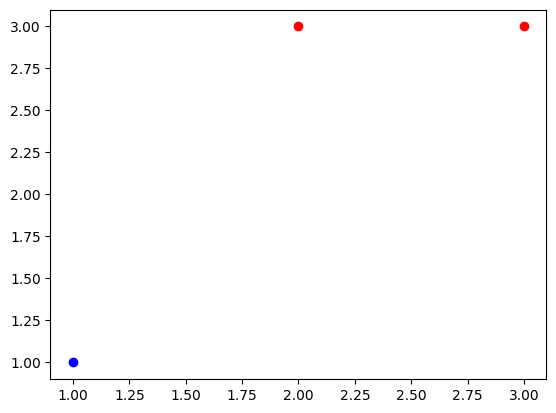

In [4]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()

Init weights: [[-0.93447944]
 [-0.27577663]
 [ 0.76834571]]
Final weights: [[ 0.18552053]
 [-0.23577664]
 [ 0.08834573]]


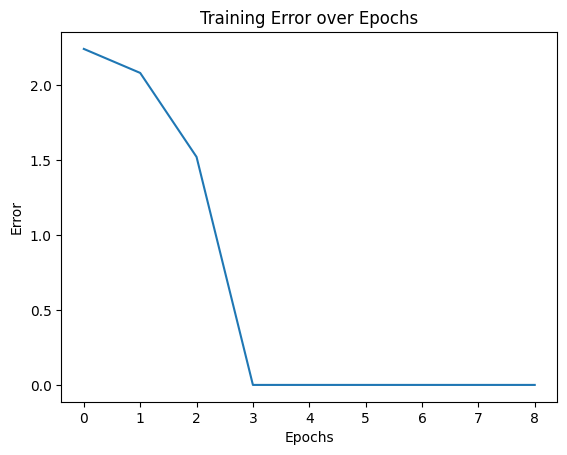

In [5]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=1000, learning_rate=0.01)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

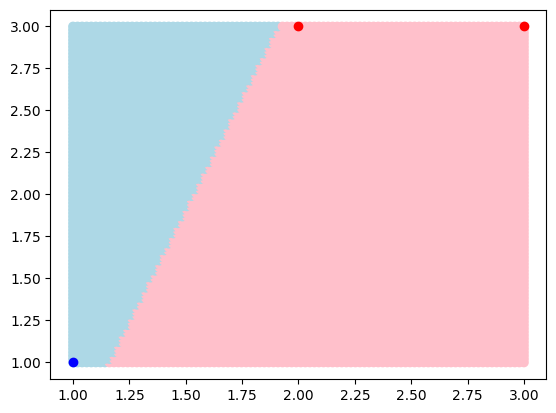

In [6]:
# Create grid points using meshgrid
x1 = np.linspace(1, 3, 100)
x2 = np.linspace(1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [7]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

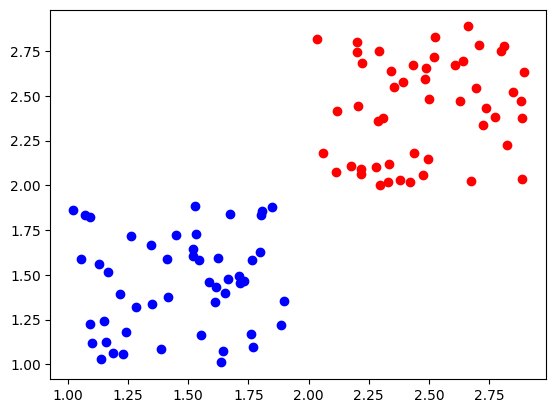

In [8]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

Init weights: [[ 0.90188439]
 [ 0.79140528]
 [-0.64462727]]
Final weights: [[ 2.30188441]
 [-0.38548844]
 [-0.82771773]]


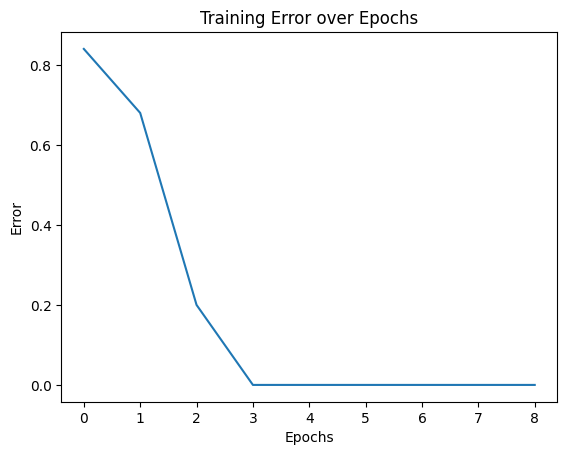

In [9]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=1000, learning_rate=0.1)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

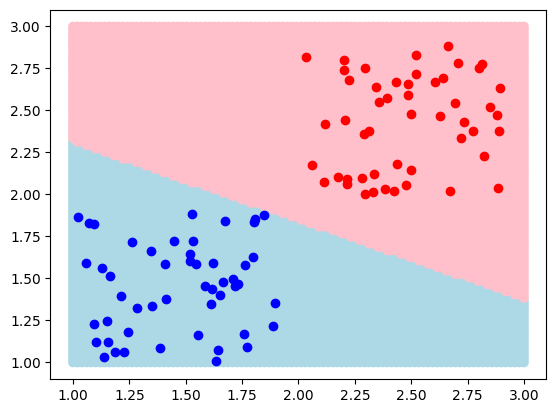

In [11]:
# Create grid points using meshgrid
x1 = np.linspace(1, 3, 100)
x2 = np.linspace(1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [12]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

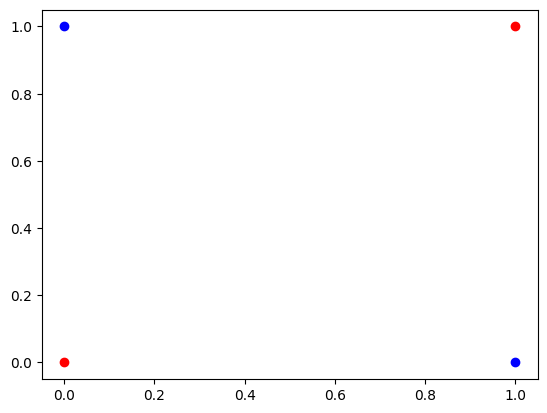

In [13]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

Init weights: [[ 0.12335179]
 [-0.43849052]
 [-0.73442234]]
Final weights: [[ 0.12335179]
 [-0.43849052]
 [ 3.26557766]]


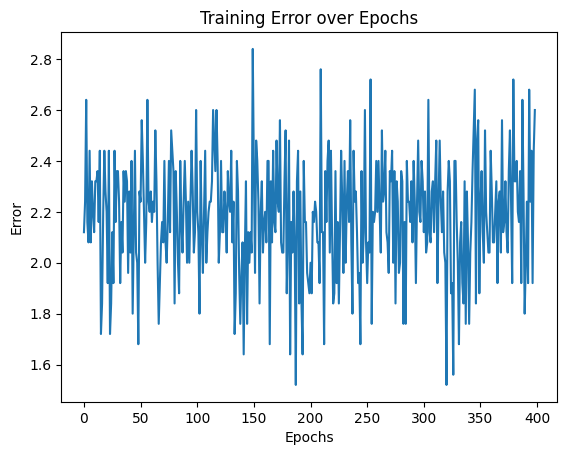

In [15]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=40000, learning_rate=1)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

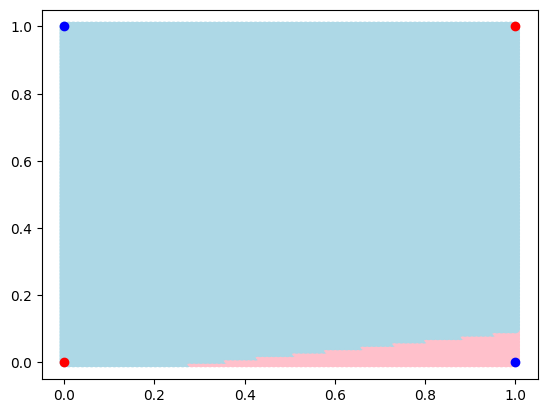

In [17]:
# Create grid points using meshgrid
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [18]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

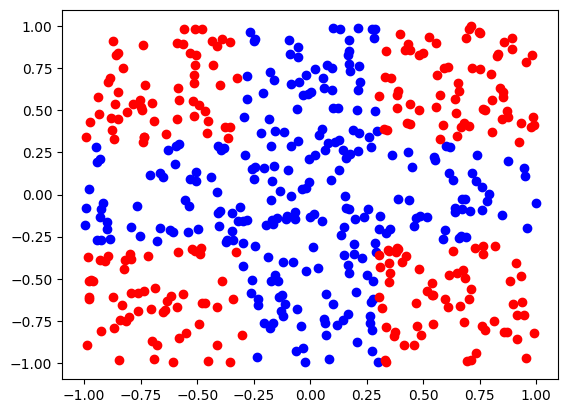

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [20]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X])

X = X[[not np.all(arr == [-1, -1, -1]) for arr in Y]]
Y = Y[[not np.all(arr == [-1, -1, -1]) for arr in Y]]

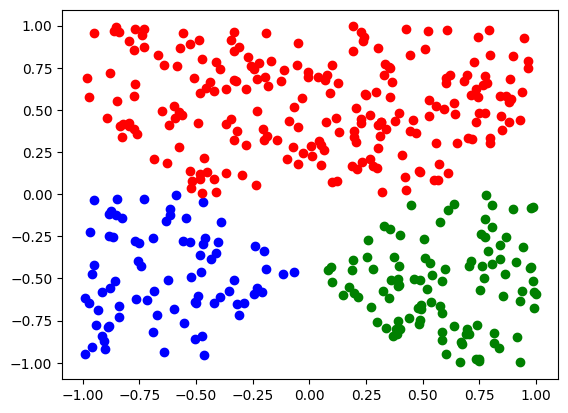

<Figure size 640x480 with 0 Axes>

In [21]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

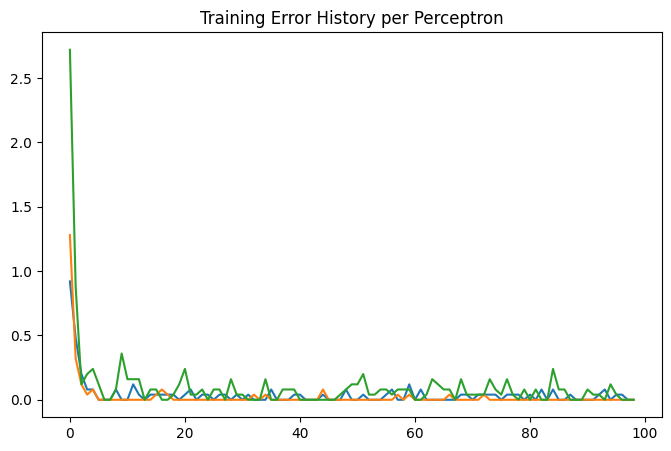

In [31]:
models = [
    ML_lib.PerceptronModel(input_size=2),
    ML_lib.PerceptronModel(input_size=2),
    ML_lib.PerceptronModel(input_size=2)
]

error_history = []

# Train each perceptron on its own class labels and collect errors
for i, model in enumerate(models):
    errors = model.train(X, Y[:, i], epochs=10000, learning_rate=0.01)
    error_history.append(errors)

# Convert list to array for easy handling (shape: (3, epochs))
error_history = np.array(error_history)

# Plot the error curves
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(error_history[i])

plt.title("Training Error History per Perceptron")
plt.show()


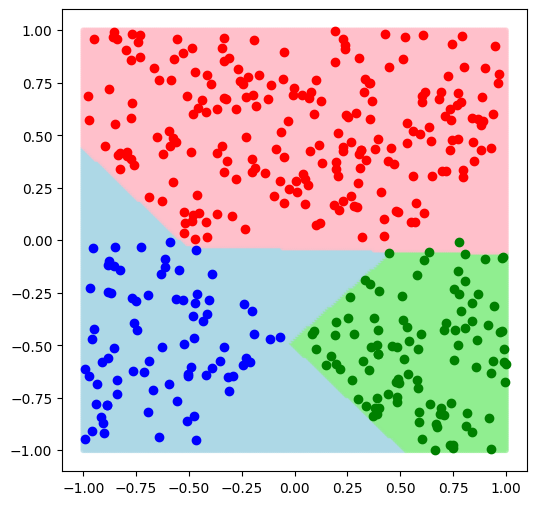

In [29]:
# Create grid points using meshgrid
x1 = np.linspace(-1, 1, 200)
x2 = np.linspace(-1, 1, 200)
X1, X2 = np.meshgrid(x1, x2)
X_bg = np.column_stack((X1.ravel(), X2.ravel()))  # shape (N, 2)

# Get predictions (scores) from each perceptron model
scores = [model.predict_batch(X_bg) for model in models]  # each shape (N, 1)
scores = np.hstack(scores)  # shape (N, 3)

# Pick the class with the highest score
preds = np.argmax(scores, axis=1)

# Define colors for 3 classes
color_map = np.array(['lightblue', 'pink', 'lightgreen'])
colors = color_map[preds]

# Plot the decision regions
plt.figure(figsize=(6, 6))
plt.scatter(X_bg[:, 0], X_bg[:, 1], c=colors, s=10, alpha=0.6)

# (Optional) Plot your original points if you have X, Y
# plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), edgecolor='k', s=50)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [32]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

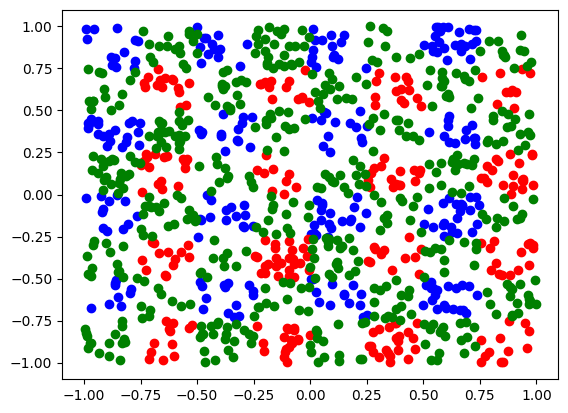

<Figure size 640x480 with 0 Axes>

In [33]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [34]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

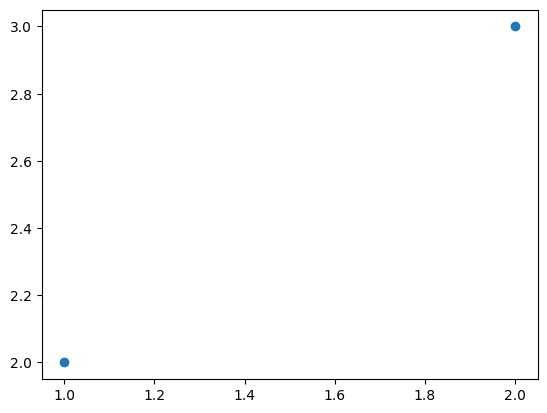

<Figure size 640x480 with 0 Axes>

In [35]:
plt.scatter(X,Y)
plt.show()
plt.clf()

Init weights: [[0.78777821]
 [0.33690487]]
Trained weights: [[1.]
 [1.]]


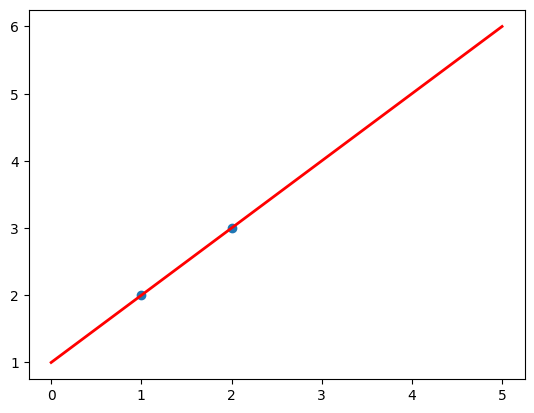

In [36]:
lr = ML_lib.LinearRegressor(input_size=1)
print("Init weights:", lr.get_weights())
lr.train(X, Y)
print("Trained weights:", lr.get_weights())

x_values = np.linspace(0, 5)
x_values = np.expand_dims(x_values, axis=1) # Make it a 2D array with shape (100, 1)

y_values = lr.predict_batch(x_values)

plt.figure()

# Plot the line (x, y)
plt.plot(x_values, y_values, color='red', linewidth=2)
plt.scatter(X, Y)

plt.show()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [37]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

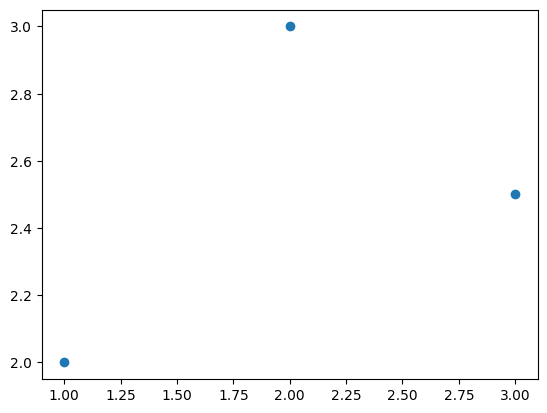

<Figure size 640x480 with 0 Axes>

In [38]:
plt.scatter(X,Y)
plt.show()
plt.clf()

Init weights: [[ 0.64911556]
 [-0.9419104 ]]
Trained weights: [[2.  ]
 [0.25]]


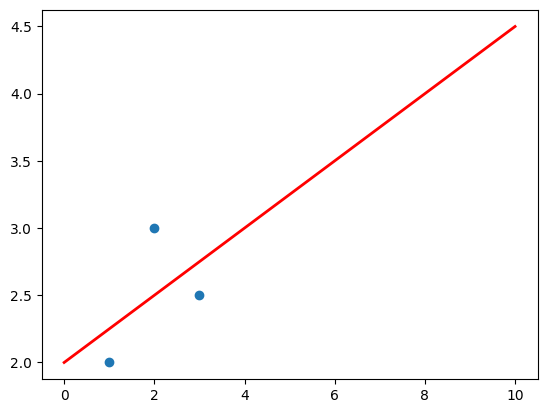

In [39]:
lr = ML_lib.LinearRegressor(input_size=1)
print("Init weights:", lr.get_weights())
lr.train(X, Y)
print("Trained weights:", lr.get_weights())

x_values = np.linspace(0, 10)
x_values = np.expand_dims(x_values, axis=1) # Make it a 2D array with shape (100, 1)

y_values = lr.predict_batch(x_values)

plt.figure()

# Plot the line (x, y)
plt.plot(x_values, y_values, color='red', linewidth=2)
plt.scatter(X, Y)

plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [40]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

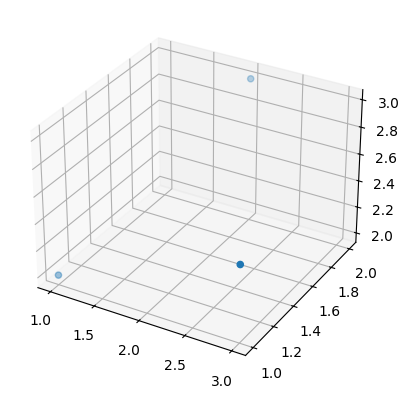

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(X[:,0], X[:,1], Y)

plt.show()

Init weights: [[ 0.22634799]
 [-0.14249943]
 [-0.9166766 ]]
Trained weights: [[1.  ]
 [0.25]
 [0.75]]


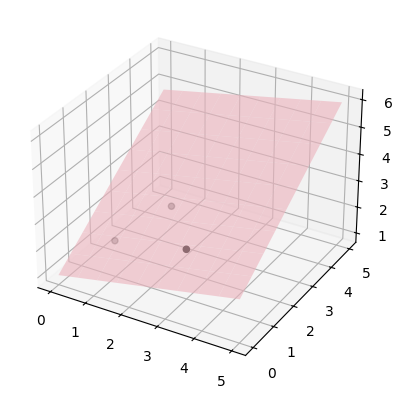

In [42]:
lr = ML_lib.LinearRegressor(input_size=2)
print("Init weights:", lr.get_weights())
lr.train(X, Y)
print("Trained weights:", lr.get_weights())

x1_values = np.linspace(0, 5, 10)  # 10 points from 0 to 10
x2_values = np.linspace(0, 5, 10)

# Create 2D grid from the two linspaces
x1_values, x2_values = np.meshgrid(x1_values, x2_values)

# flatten the grid to create input pairs
x1_values = x1_values.ravel()  # shape (100,)
x2_values = x2_values.ravel()

x_values = np.column_stack((x1_values, x2_values))

y_values = lr.predict_batch(x_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
# Reshape back to 2D grid (for surface plotting)
X1 = x_values[:, 0].reshape(10, 10)
X2 = x_values[:, 1].reshape(10, 10)
Y_pred = y_values.reshape(10, 10)

# Use plot_surface instead of scatter for smooth plane
ax.plot_surface(X1, X2, Y_pred, color='pink', alpha=0.6)
ax.scatter(X[:,0], X[:,1], Y, color='black', label='Training data')


plt.show()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [43]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

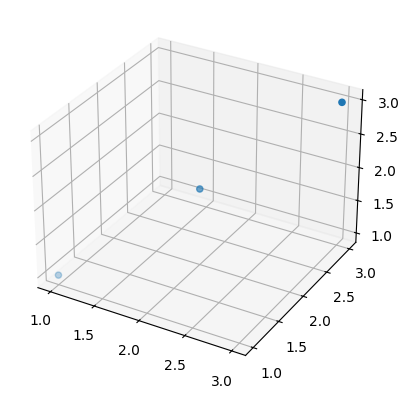

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(X[:,0], X[:,1], Y)

plt.show()

Init weights: [[ 0.19998818]
 [-0.9081727 ]
 [ 0.8450645 ]]
Trained weights: [[7.72409461e-16]
 [1.00000000e+00]
 [0.00000000e+00]]


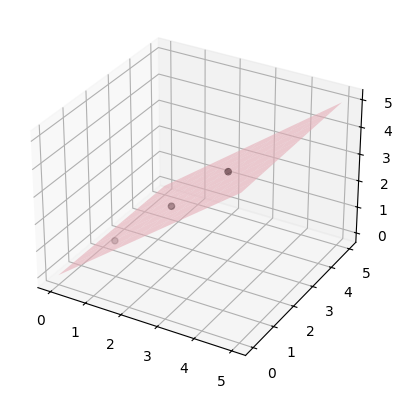

In [45]:
lr = ML_lib.LinearRegressor(input_size=2)
print("Init weights:", lr.get_weights())
lr.train(X, Y)
print("Trained weights:", lr.get_weights())

x1_values = np.linspace(0, 5, 10)  # 10 points from 0 to 10
x2_values = np.linspace(0, 5, 10)

# Create 2D grid from the two linspaces
x1_values, x2_values = np.meshgrid(x1_values, x2_values)

# flatten the grid to create input pairs
x1_values = x1_values.ravel()  # shape (100,)
x2_values = x2_values.ravel()

x_values = np.column_stack((x1_values, x2_values))

y_values = lr.predict_batch(x_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
# Reshape back to 2D grid (for surface plotting)
X1 = x_values[:, 0].reshape(10, 10)
X2 = x_values[:, 1].reshape(10, 10)
Y_pred = y_values.reshape(10, 10)

# Use plot_surface instead of scatter for smooth plane
ax.plot_surface(X1, X2, Y_pred, color='pink', alpha=0.6)
ax.scatter(X[:,0], X[:,1], Y, color='black', label='Training data')


plt.show()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [46]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

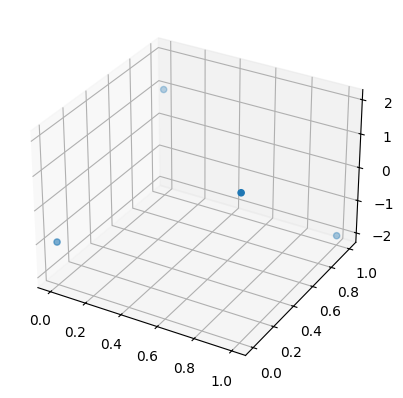

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(X[:,0], X[:,1], Y)

plt.show()

Init weights: [[ 0.4055252 ]
 [-0.10786445]
 [-0.50165112]]
Trained weights: [[ 5.00000000e-01]
 [-5.55111512e-17]
 [-1.00000000e+00]]


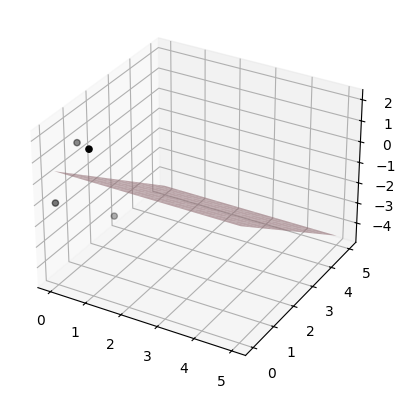

In [48]:
lr = ML_lib.LinearRegressor(input_size=2)
print("Init weights:", lr.get_weights())
lr.train(X, Y)
print("Trained weights:", lr.get_weights())

x1_values = np.linspace(0, 5, 10)  # 10 points from 0 to 10
x2_values = np.linspace(0, 5, 10)

# Create 2D grid from the two linspaces
x1_values, x2_values = np.meshgrid(x1_values, x2_values)

# flatten the grid to create input pairs
x1_values = x1_values.ravel()  # shape (100,)
x2_values = x2_values.ravel()

x_values = np.column_stack((x1_values, x2_values))

y_values = lr.predict_batch(x_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
# Reshape back to 2D grid (for surface plotting)
X1 = x_values[:, 0].reshape(10, 10)
X2 = x_values[:, 1].reshape(10, 10)
Y_pred = y_values.reshape(10, 10)

# Use plot_surface instead of scatter for smooth plane
ax.plot_surface(X1, X2, Y_pred, color='pink', alpha=0.6)
ax.scatter(X[:,0], X[:,1], Y, color='black', label='Training data')


plt.show()